In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv

In [2]:
TS_CSV = './510_parest_r_ts.csv'
CONFIG_CSV='./510_parest_r_regret_out.csv'

In [3]:
df = pd.read_csv(TS_CSV)
df.head()


,Timestamp,run_warm_up,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,...,run_43,run_44,run_45,run_46,run_47,run_48,run_49,run_50,run_default_jemalloc,run_default_tcmalloc
0,0,0.000435,0.003248,0.004263,0.006599,0.011433,0.004747,0.004146,0.002875,0.008202,...,0.003209,0.003309,0.003316,0.003267,0.007962,0.003277,0.003163,0.003244,0.003244,0.006190
1,1,0.270761,0.272698,0.306203,0.302618,0.283706,0.263743,0.295782,0.270187,0.286165,...,0.201587,0.255334,0.215509,0.203975,0.302300,0.257741,0.271325,0.195241,0.269940,0.285565
2,2,0.224392,0.214354,0.232944,0.228032,0.229924,0.213144,0.237168,0.222523,0.219928,...,0.213608,0.206966,0.237613,0.219684,0.232179,0.211583,0.219954,0.207657,0.220087,0.226345
3,3,0.226073,0.216297,0.234706,0.229710,0.231585,0.214915,0.237516,0.224210,0.221868,...,0.215590,0.208997,0.237503,0.218643,0.234476,0.210655,0.219590,0.209649,0.221771,0.228009
4,4,0.396017,0.374315,0.403216,0.400897,0.425119,0.379315,0.372619,0.400248,0.400965,...,0.375295,0.328222,0.415234,0.218643,0.403103,0.371970,0.387092,0.339208,0.387355,0.374338


In [4]:
configs = pd.read_csv(CONFIG_CSV)
configs.head()

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_max,je_max_background_threads,je_metadata_thp,je_mutex_max_spin,je_muzzy_decay_ms,je_narenas,je_oversize_threshold,je_percpu_arena,je_retain,je_thp,je_trust_madvise,rss
0,False,True,7803,secondary,20,3,63,auto,813,13255,344,26369833,percpu,False,never,False,0.460272
1,True,False,35923,primary,3,16,29,always,1389,29693,48,9286843,phycpu,True,default,True,14.030711
2,True,True,15677,primary,11,29,50,disabled,1844,47258,276,7596887,disabled,False,always,False,10.720330
3,False,False,37571,disabled,17,15,20,auto,58,8236,613,23855301,phycpu,True,always,True,24.552287
4,False,True,29874,disabled,15,5,47,disabled,2200,34348,206,18144054,disabled,True,never,True,3.610614


In [5]:
configs.nsmallest(5, 'rss')

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_max,je_max_background_threads,je_metadata_thp,je_mutex_max_spin,je_muzzy_decay_ms,je_narenas,je_oversize_threshold,je_percpu_arena,je_retain,je_thp,je_trust_madvise,rss
42,False,True,344,disabled,2,13,58,disabled,731,251,534,199629,disabled,True,default,True,-7.109232
33,False,True,479,disabled,3,6,46,auto,731,251,452,1718862,disabled,True,default,True,-6.654362
49,False,False,523,disabled,11,14,58,auto,388,251,534,199629,disabled,True,default,True,-5.097731
47,False,False,458,secondary,1,5,57,disabled,731,251,534,1174246,disabled,False,default,True,-4.958342
28,False,True,1151,primary,3,10,56,auto,731,251,534,3648663,phycpu,False,default,True,-4.794062


In [6]:
smallest_indices = configs.nsmallest(3, 'rss').index.tolist()

# Step 2: Map these indices to the corresponding column names in `df`
selected_columns = [f'run_{i+1}' for i in smallest_indices if f'run_{i}' in df.columns]
selected_columns

['run_43', 'run_34', 'run_50']

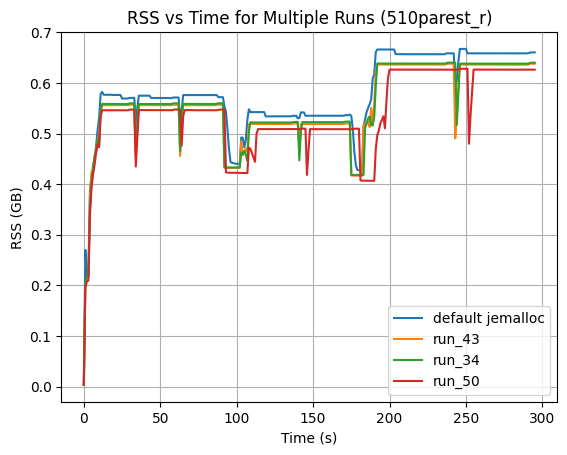

In [7]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(TS_CSV)
graph_name = TS_CSV.replace('_ts.csv', '').replace('_', '', 1)[2:]

# Extract timestamps and RSS values for each run
timestamps = df['Timestamp']
warmup = df['run_warm_up']
default = df['run_default_jemalloc']
tc_default = df['run_default_tcmalloc']

# plt.plot(timestamps, warmup / (1024*1024), label='warm_up')
plt.plot(timestamps, default, label='default jemalloc')
#plt.plot(timestamps, tc_default / (1024*1024), label='default tcmalloc')
for column in selected_columns:  # Skip 'Timestamp'
    plt.plot(timestamps, df[column], label=column)

# Customize plot
plt.xlabel('Time (s)')
plt.ylabel('RSS (GB)')
plt.title(f'RSS vs Time for Multiple Runs ({graph_name})')
plt.legend()
plt.grid(True)

# Display plot
plt.show()


In [8]:
default_conf_dict = {'je_cache_oblivious': True, 'je_metadata_thp': 'disabled', 'je_trust_madvise': False, 'je_retain': True, 'je_dss': 'secondary', 'je_narenas': 160, 'je_oversize_threshold': 8388608, 'je_background_thread': False, 'je_max_background_threads': 40, 'je_dirty_decay_ms': 10000, 'je_muzzy_decay_ms': 10000, 'je_lg_extent_max_active_fit': 6, 'je_tcache': True, 'je_lg_tcache_max': 15, 'je_thp': 'default', 'je_percpu_arena': 'default', 'je_mutex_max_spin': '1600'}
default_conf_dict = dict(sorted(default_conf_dict.items()))
default_conf_dict.update({'rss': 0})
default_conf_df = pd.DataFrame([default_conf_dict])
default_conf_df

smallest_configs = configs.nsmallest(3, 'rss').copy()

# Add an identifier column to distinguish these configurations clearly
smallest_configs['config'] = selected_columns

# Add identifier to default configuration
default_conf_df['config'] = 'default'

# Concatenate vertically to compare clearly
comparison_df = pd.concat([smallest_configs, default_conf_df], ignore_index=True)

# Move 'config' column to the front and 'rss' column to the end for readability
cols = ['config'] + [col for col in comparison_df.columns if col not in ['config', 'rss']] + ['rss']
comparison_df = comparison_df[cols]

comparison_df.T

,0,1,2,3
config,run_43,run_34,run_50,default
je_background_thread,False,False,False,False
je_cache_oblivious,True,True,False,True
je_dirty_decay_ms,344,479,523,10000
je_dss,disabled,disabled,disabled,secondary
je_lg_extent_max_active_fit,2,3,11,6
je_lg_tcache_max,13,6,14,15
je_max_background_threads,58,46,58,40
je_metadata_thp,disabled,auto,auto,disabled
je_mutex_max_spin,731,731,388,1600


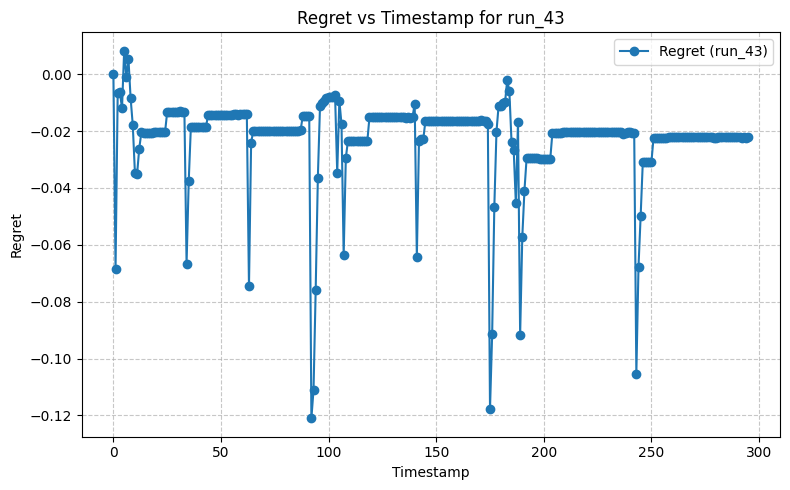

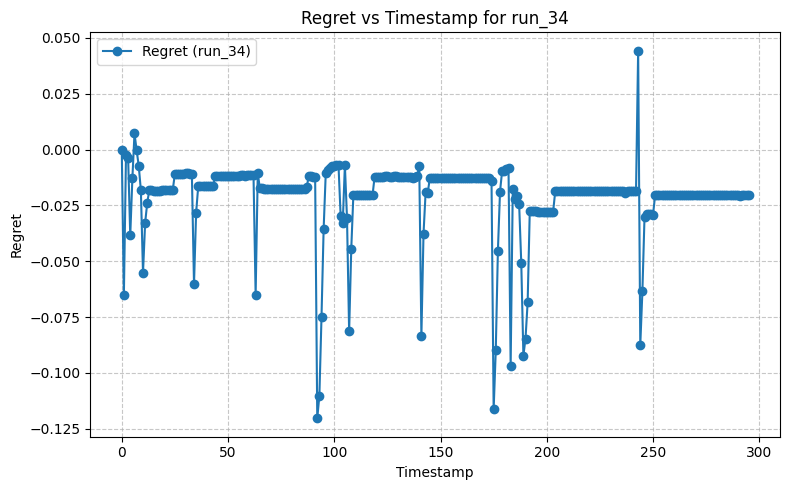

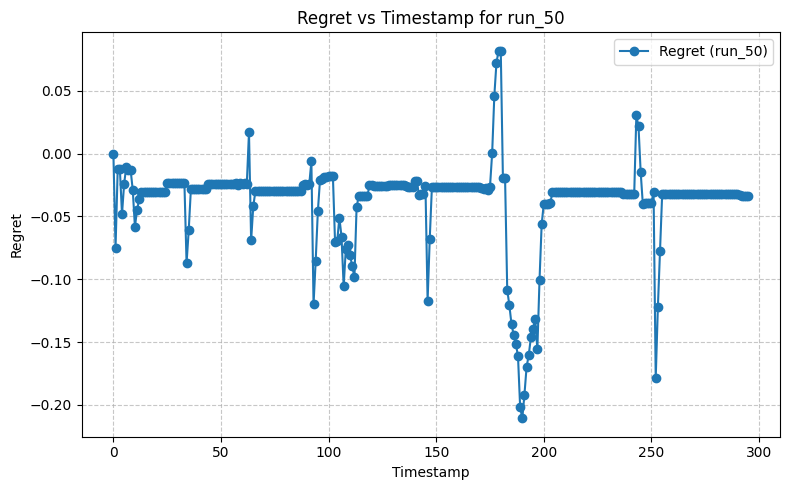

In [9]:
smallest_indices = configs.nsmallest(3, 'rss').index.tolist()

# Step 2: Map these indices to the corresponding column names in `df`
selected_columns = [f'run_{i+1}' for i in smallest_indices if f'run_{i+1}' in df.columns]

# Step 3: Generate separate plots for each selected column
for column in selected_columns:
    # Calculate regret for the current column
    regret =  (df[column] - df['run_default_jemalloc'])
    
    # Create a new plot for this column
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Plot the regret against the index
    ax.plot(regret.index, regret.values, marker='o', label=f'Regret ({column})')
    
    # Customize the plot
    ax.set_title(f'Regret vs Timestamp for {column}')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Regret')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

In [3]:
TIMESERIES_FILE = './538_imagick_r_timeseries.csv'
csvfile = pd.read_csv(TIMESERIES_FILE)
timestamps = csvfile['Timestamp']
rss_values = csvfile['RSS'] / (1024*1024)

# Plotting the RSS values over time
plt.plot(timestamps, rss_values, label='RSS over Time', marker='o')
plt.xlabel('Time (s)')  # X-axis label
plt.ylabel('RSS (MB)')  # Y-axis label
plt.title('RSS vs Time')  # Title of the plot
plt.legend()  # Display the legend
plt.grid(True)  # Add a grid for better readability

# Display the plot in the notebook
plt.show()


EmptyDataError: No columns to parse from file